### Exploratory data analysis 

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# reading the preprocessed data 
data = pd.read_csv("preprocessed.csv")

In [3]:
""" Printing the counts of the values in the dataset  and the shape of the dataset . """

print(data.count())
print("*"*50)
print("The shape of the data is ",data.shape)   

Order                                                         11746
Property Id                                                   11746
Property Name                                                 11746
Parent Property Id                                            11746
Parent Property Name                                          11746
BBL - 10 digits                                               11735
NYC Borough, Block and Lot (BBL) self-reported                11735
NYC Building Identification Number (BIN)                      11584
Address 1 (self-reported)                                     11746
Postal Code                                                   11746
Street Number                                                 11622
Street Name                                                   11624
Borough                                                       11628
DOF Gross Floor Area                                          11628
Primary Property Type - Self Selected           

#### Note.

1. There are 60 features in the dataset and in a short period of time we cannot go for univarient annalysis of all the features.
2. The path we will follow is to see some features by intution and check the beahvior of the features and interaction with the target values, we will try to plot the Box plots for the numerical values for checking the outliers . 
3. Then we select the import features from the data set, the techniques which we will follow is Forward Feature selction commonly known as Ainova , there are other techiniques which can be used but i will go with this method as from experimenting i found it really working well.

4. Basically in the In the processes of data analysis or Exploratory data analysis we try to find the relationship of the feature columns with the tagret values.
5. So now we will try to find diffrent parameters like the corealtion , covarince , distribution of the feature columns with the target variable .  
6. As we have already seen there are 17% missing values in the data column.

In [4]:
"""

Lets have a look on the detailed stat and histogram of the features in the data and try to understand the features 
and their distributions and how they effect the target variable . 


"""
import pandas_profiling as pf
pf.ProfileReport(data)

/usr/local/lib/python3.5/dist-packages/pandas_profiling/base.py:319: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,49
Number of observations,11746
Total Missing (%),5.5%
Total size in memory,4.4 MiB
Average record size in memory,392.0 B
Numeric,20
Categorical,20
Date,0
Text (Unique),0
Rejected,9
Distinct count,11645


####  Exploring ENERGY STAR Score (target variable) .

1. Exploring the target values in the below section try to find the trends and the distribution of the continous varible.
2. Reson we will explore this varibale is beacuse we want to precit this values as accuratly as possbile and generalise well on the test data 
3. Checking on the features which have a high correlation on this and the features which has very high corealltion among them selfs .

In [25]:
""" value_counts() function in pandas gets the count of the values in the ENERGY STAR Score. """
print(data['ENERGY STAR Score'].value_counts())

100.0    649
1.0      299
99.0     162
80.0     144
84.0     142
        ... 
10.0      48
12.0      47
42.0      47
21.0      46
11.0      44
Name: ENERGY STAR Score, Length: 100, dtype: int64


In [28]:
data['ENERGY STAR Score'].describe()

count    9642.000000
mean       59.854594
std        29.993586
min         1.000000
25%        37.000000
50%        65.000000
75%        85.000000
max       100.000000
Name: ENERGY STAR Score, dtype: float64

In [26]:
""" printing the max() value in the dataframe """
print(data['ENERGY STAR Score'].max())

100.0


In [27]:
""" printing the Min() value in the dataframe """
print(data['ENERGY STAR Score'].min())

1.0


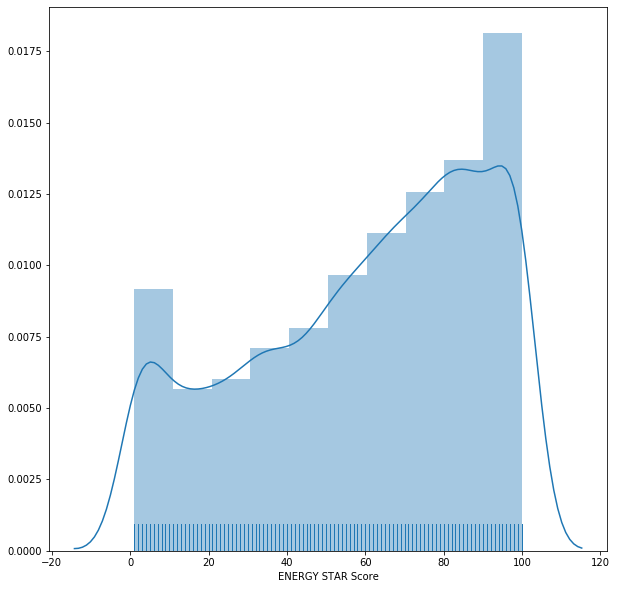

In [42]:
"""
For better understanding of the counts lets plot the Histogram with the KDE(Kernal Density estamate) 
for understanding the Distribution of the data we use the KDE or the PDF Function . 

The below plot shows that the it is a bit skewned to the right side and has higher values at bins posyion of 0 and 100.


we have used the bin size as 10 because the range of the target value is from 0 -100 .
"""

fig= plt.figure(figsize=(10,10))
sns.distplot(data['ENERGY STAR Score'], bins=10, kde=True, rug=True);

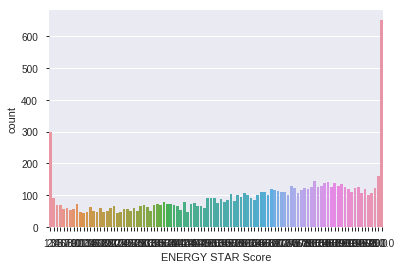

In [26]:
sns.countplot(x='ENERGY STAR Score',data=data)

### Conclusion:

1. So we know the that the range of values in the column is 1 - 100, the maximum value is 100 and minimum values is 0.
2. The distrubutions shows the count of the variables in form of histograms .
3. The KDE shows the Probability density function of the data values.

### Exploring the Column Source EUI (kBtu/ft²) 

In [84]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

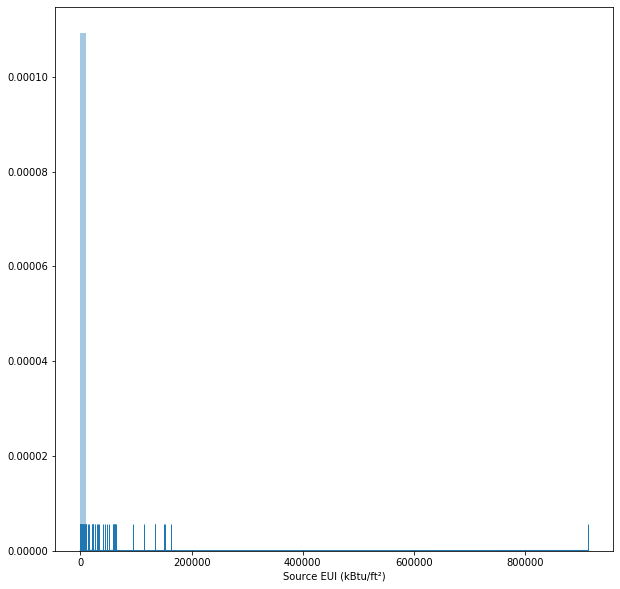

In [85]:
"""
this plot represents that there is a very high range of the values in Site EUI , we have to consider the IQR 
values fro better represenation.

"""
fig= plt.figure(figsize=(10,10))
sns.distplot(data["Source EUI (kBtu/ft²)"], bins=100, kde=True, rug=True);

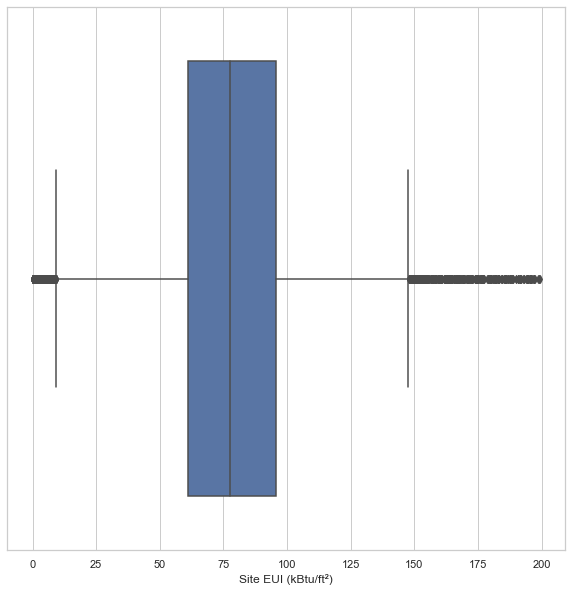

In [147]:
"""
For inspecting if there are outliers in the data we basically use the box plots 
The box-and-whisker plots give us an estimate interms of range and the distribution of the data in terms of IQR(inter-quartine - range)

ref: https://seaborn.pydata.org/generated/seaborn.boxplot.html

"""
fig= plt.figure(figsize=(10,10))
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data['Site EUI (kBtu/ft²)'])



##### Conclusion from the above plots:

1. There are extreme values and a lots of outliers in the column and we have to remove all the outlers 
2. We are removing the outliers because having the outliers will impact the models performance, specially if we were using the 
   probailistc or linear models 
3. Outliers can cause the varience of the data to go on the higher side.
4. for the above mentioned reasons we remove the outliers.
5. By removing the outliers , we can convert the distribution of the data into gaussian distribution or normal distribution so    that we can get the modles work better in the 1st place . 


##### Removing the outliers form Site EUI (kBtu/ft²) feature: 

1. As we have seen in the conclusion above that box plots can show the IQR values and the data points that lie outside of this range are called outliers.
2. The IQR is defined as IQR = Q3 – Q1.
3. Q3 and Q1 are the Quantien values (Quantien are nothing but the percentage of teh values in the range)

ref:https://www.statisticshowto.com/probability-and-statistics/interquartile-range/


In [4]:
""" Now we will teh quantine values for removing the outliers values """
data = data.rename(columns = {'ENERGY STAR Score': 'score'})
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# The IQR is defined as IQR = Q3 – Q1.
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

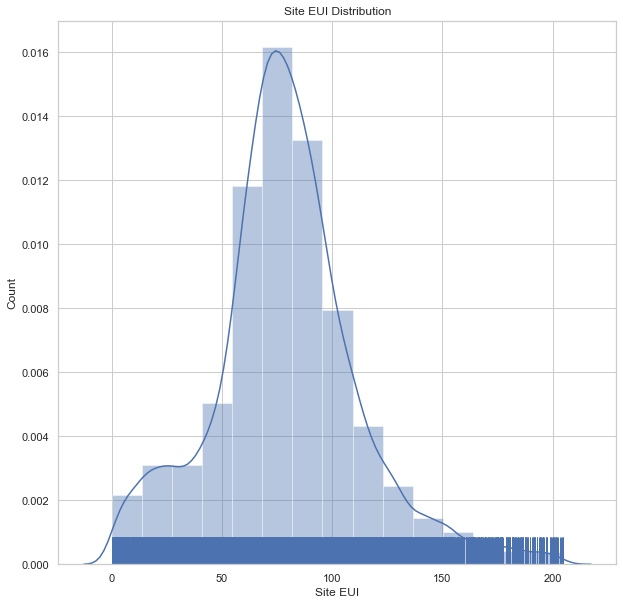

In [122]:
"""
for ploting this we can adjust the bin size and it will result in having different distributions. 

"""

fig= plt.figure(figsize=(10,10))
sns.distplot(data['Site EUI (kBtu/ft²)'], bins=15, kde=True, rug=True);
plt.xlabel('Site EUI') 
plt.ylabel('Count')
plt.title('Site EUI Distribution')

#### Conclusion 

1. After removing the Outlers we see that the distribution of the data is gaussian or naormal bell shaped not exactly but similiar , we do it becasue we want your models to fit well in the data . 

ref: https://towardsdatascience.com/why-data-scientists-love-gaussian-6e7a7b726859
ref: https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/gaussian-distribution

### Exploring the Column Occupancy

In [88]:
data["Occupancy"].describe()

count    11746.000000
mean        98.762557
std          7.501603
min          0.000000
25%        100.000000
50%        100.000000
75%        100.000000
max        100.000000
Name: Occupancy, dtype: float64

C:\Users\sujit\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Occupancy of buildings')

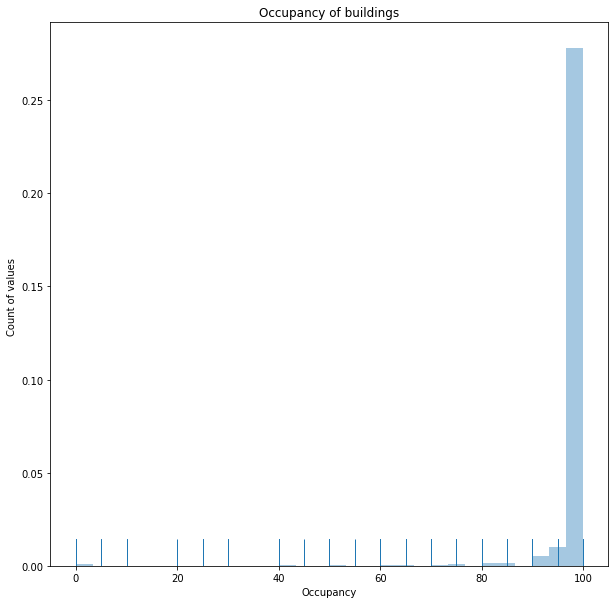

In [86]:
"""
as we see above majority of the points in this feature coloum lies in range of 80-100.

here we are anaysing the feature column for Occupancy by using the histograms to represent the values better .

"""

fig= plt.figure(figsize=(10,10))
sns.distplot(data["Occupancy"], bins=30, rug=True);
plt.xlabel('Occupancy') 
plt.ylabel('Count of values ')
plt.title('Occupancy of buildings')

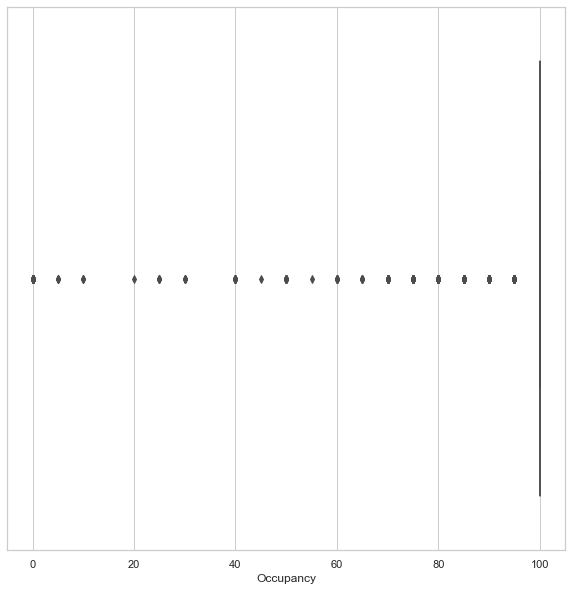

In [144]:

"""
Box plots are a good way to see the outliers in the data as we see that there is a high range of outliers in the data 
will remove all these data in the feature enginering section . 


"""

fig= plt.figure(figsize=(10,10))
import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=data["Occupancy"])

#### Consluion from above 
1. Majority of the data here is from the buildings where there is higher population of 80 and above 
2. In the Occupancy feature coulmn also we can see that the there are lots of outliers in the data 
3. The histogram represents that the Enery Consuption is very high where we have higher  Occupancy of people in the buildings

##### Now we will explore the feature coloumn " Largest Property Use Type " 

1. "Largest Property Use Type" has multiple sub categories and from commonsence we know that different buildings may have different energy consumptions.
2. So will now explore the Largest Property Use Type features and see the impact on the target values...

In [152]:
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 5].index)

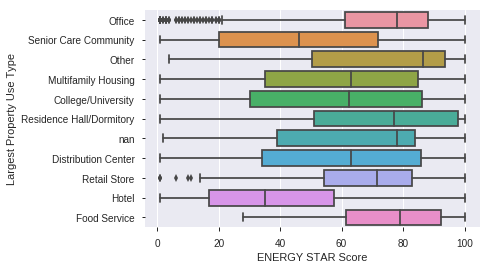

In [21]:
%matplotlib inline

"""this plot shows the spread and the outlines in the data """

sns.boxplot(data['ENERGY STAR Score'],data['Largest Property Use Type'])


In [10]:
"""
here we are ploting the values according to the subsets in the data and ploting it so that we can 
compare the exergy consuption of the data .
"""
%pylab
figsize(12, 10)
for b_type in types:
    subset = data[data['Largest Property Use Type'] == b_type]
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


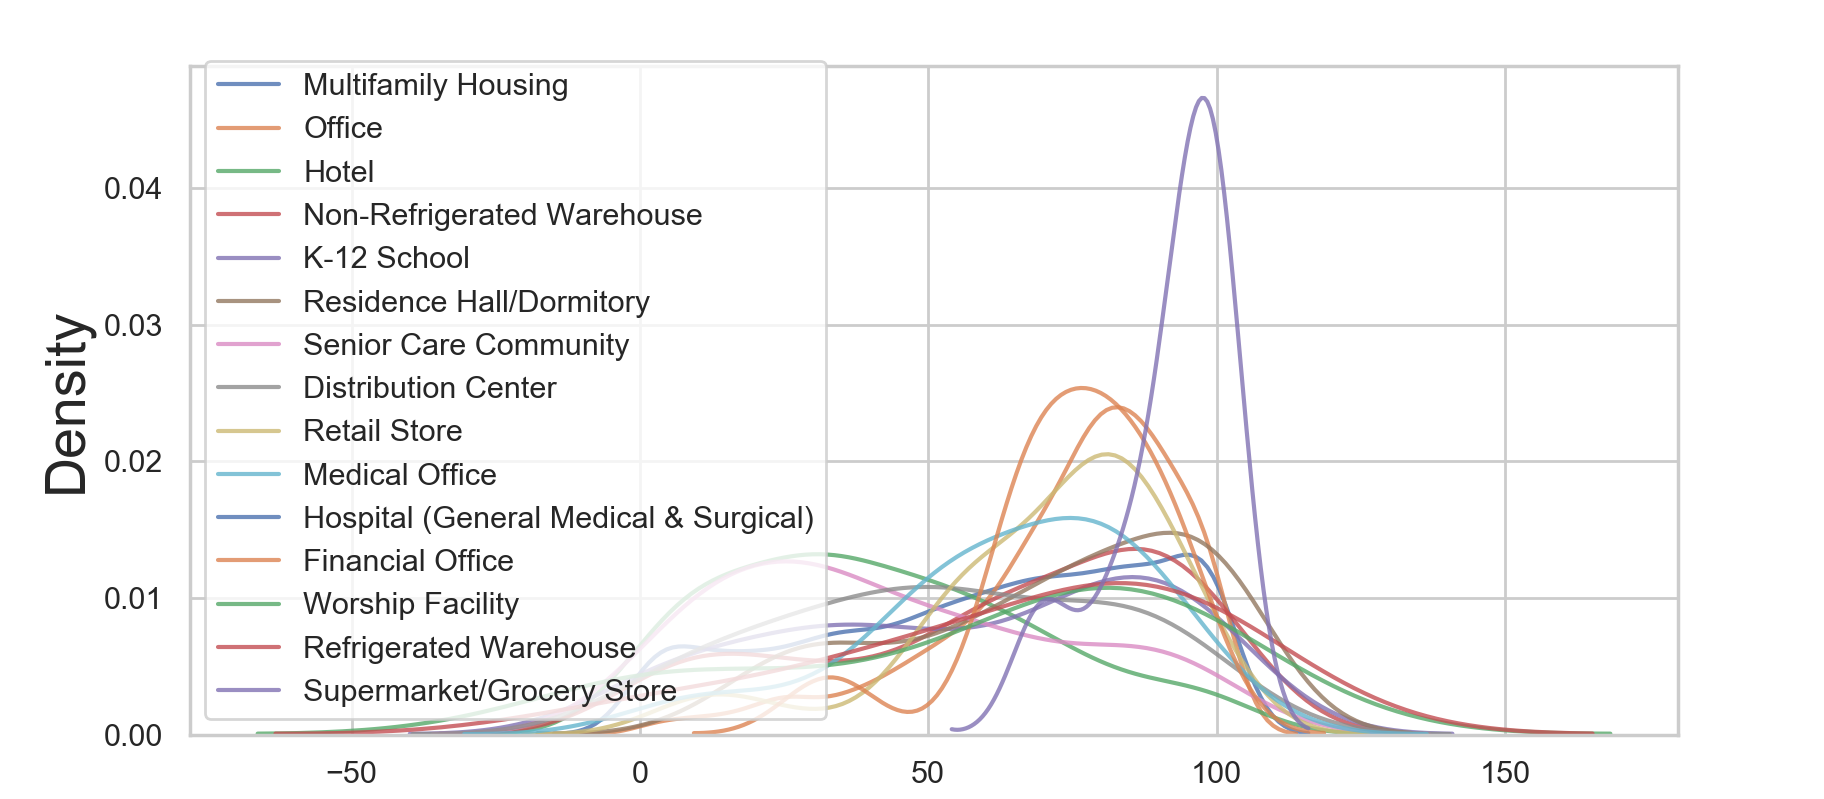

#### Concluion: 
1. From the above figure we can conclude that the different buildings have different consupitons of energy.
2. The Office has the height consuption of energy.
3. there are many where the consupitons is very less as compared to others .


##### Exploring the feature column of Borough
1. we are exploring this becasue we want to see how the consuption of engery according the geographical locations in the Given dataset  

In [168]:
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values >1].index)

In [169]:
for borough in boroughs:
    subset = data[data['Borough'] == borough]
    sns.kdeplot(subset['score'].dropna(),label = borough)

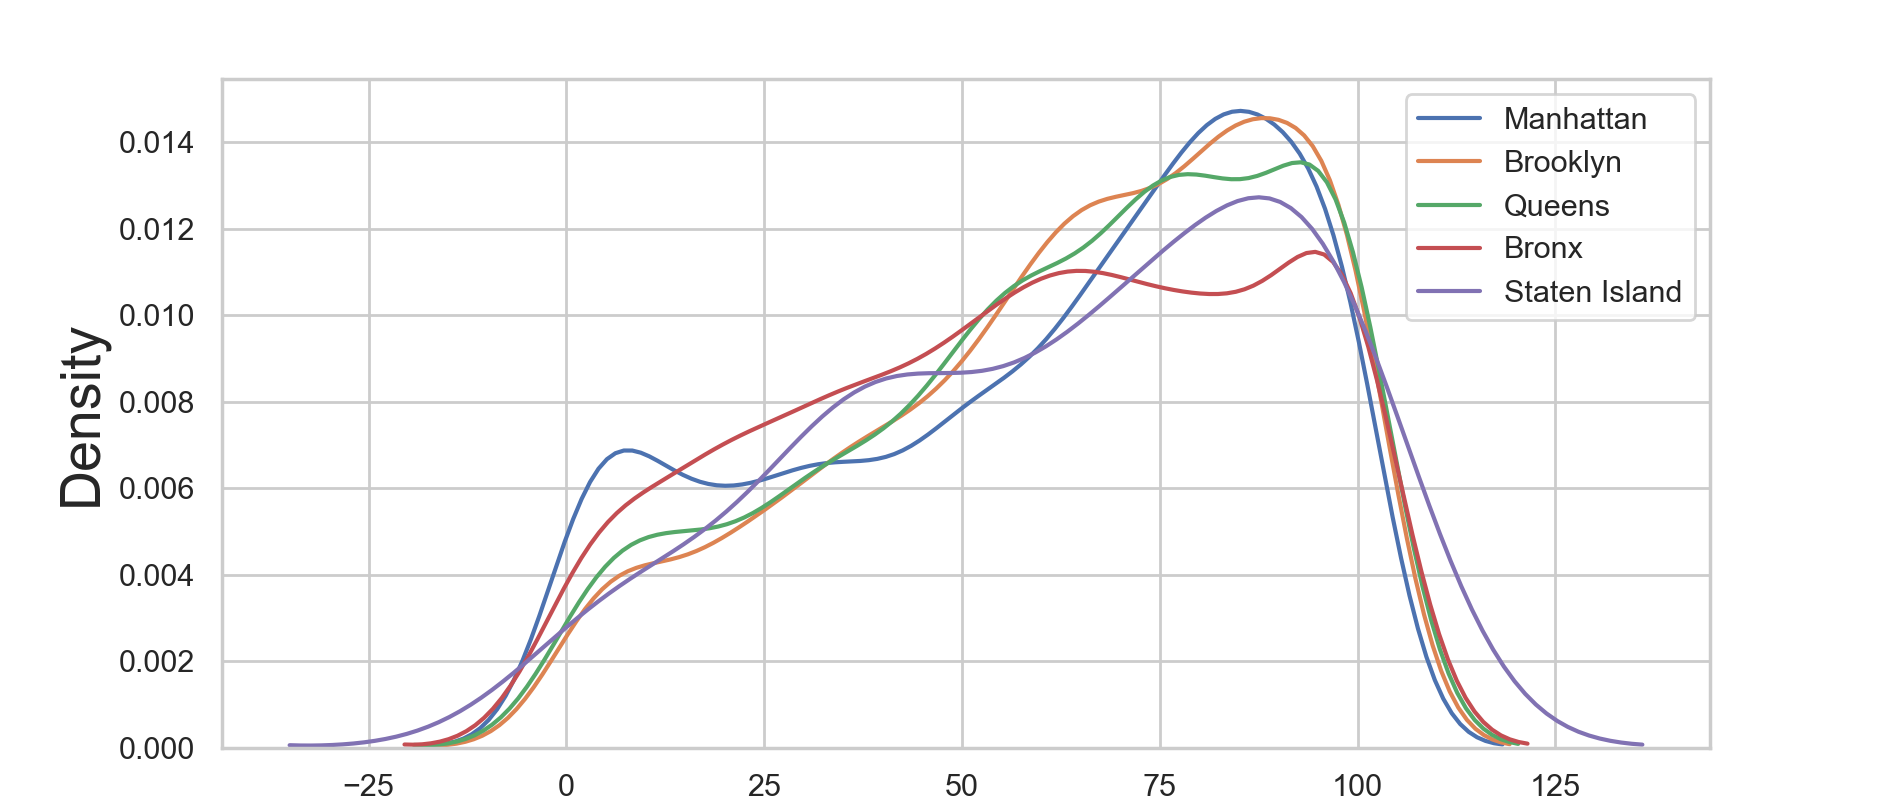

#### Consluion from above

1. There is no such difference in the energy consupitons according the geogirical locations.
2. Mostly the Enery Consuptions depens on the population and the type of building that are using the power.


In [99]:
data["Largest Property Use Type - Gross Floor Area (ft²)"].describe()

count    1.174400e+04
mean     1.605524e+05
std      3.095746e+05
min      5.400000e+01
25%      6.520100e+04
50%      9.132400e+04
75%      1.532550e+05
max      1.421712e+07
Name: Largest Property Use Type - Gross Floor Area (ft²), dtype: float64

###  Exploring the Correlations and covariance 

1. The Correlations and covarince plays and import part in model building will list down some below .
2. Highly Corellated features are not much contributing so we will remove them .\
3. We should look for the features that have the corelation with target variable and not among them selfs 

> There are multiple ways to find these corelations some of them are listed below .

1. spearman correlation : ref : https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html
2. Pearson correlation  : ref : https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/


Note : correlation are of two type monotonically increasing and monotonically decreasing so the range of it are -1 to 1 

In [216]:
"""
correlation can be easily be found by using the function in pandas Corr 

Now we will compare the comapre the correlation of the target values with all teh features . 

This will also help us in decising the feature importance. 

"""

correlations = data.corr()['score']

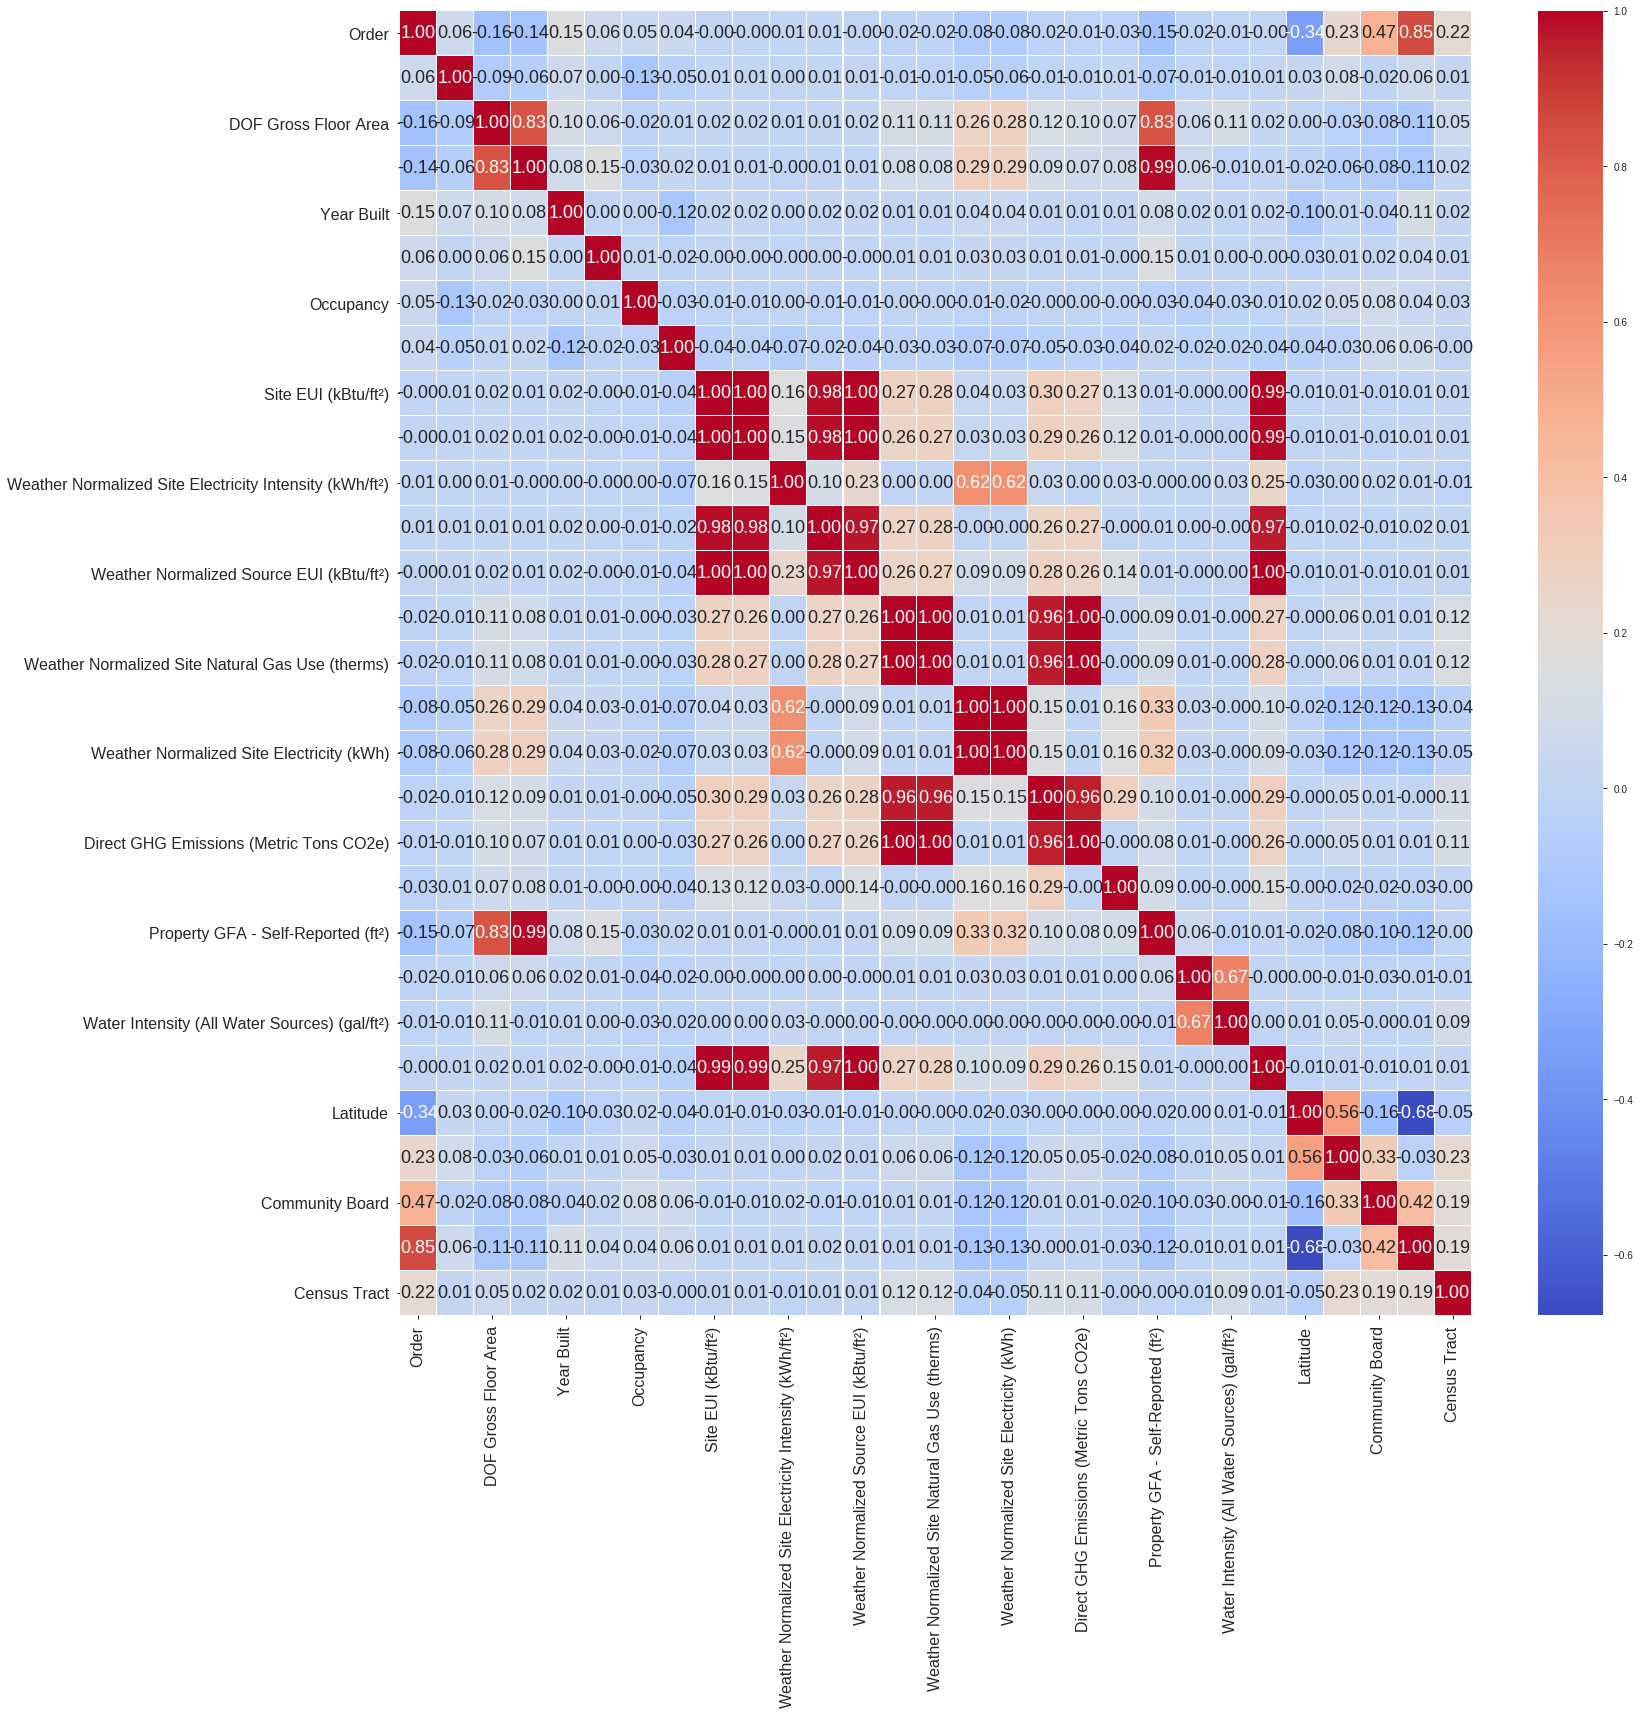

In [23]:
"""
I am using the heatmaps for printing the correlations between the features in the dataset.

"""



sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.1, annot_kws = {'size':18}, fmt = '.2f')
fig = plt.gcf()
fig.set_size_inches(24,24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

In [27]:
"""

for better visualization and represenation ploted the heat maps with values of corealltion with each values . 

"""


corr = data.corr()
corr.style.background_gradient()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
Order,1,0.0566366,-0.159678,-0.144426,0.149153,0.0603827,0.047864,0.0395243,-0.00176661,-0.000599056,0.00760858,0.0059764,-0.000777574,-0.0166279,-0.0168611,-0.0826241,-0.081981,-0.0225997,-0.0147439,-0.0291752,-0.152684,-0.0189744,-0.00989795,-0.00206046,-0.337621,0.234689,0.469983,0.854093,0.218636
Property Id,0.0566366,1,-0.0862603,-0.0605405,0.0683522,0.000859372,-0.126301,-0.0470196,0.0101817,0.00999272,0.00268833,0.00641781,0.0105329,-0.00918815,-0.00932916,-0.0542791,-0.0550151,-0.00640939,-0.00853992,0.00608219,-0.0732135,-0.00899558,-0.0050256,0.0107269,0.0253932,0.0778253,-0.0213539,0.062071,0.0149739
DOF Gross Floor Area,-0.159678,-0.0862603,1,0.829291,0.103228,0.0585825,-0.0212415,0.00687686,0.019109,0.0170611,0.00712979,0.0144278,0.0177506,0.110088,0.114658,0.264046,0.279651,0.117354,0.100678,0.0722779,0.828542,0.0597341,0.112267,0.0234443,0.00139089,-0.0305876,-0.0786342,-0.108475,0.0510454
Largest Property Use Type - Gross Floor Area (ft²),-0.144426,-0.0605405,0.829291,1,0.0810415,0.150296,-0.0310429,0.0177339,0.00956337,0.00919212,-0.00315415,0.00692239,0.00914729,0.0810859,0.0819748,0.2935,0.291917,0.0916885,0.0730126,0.0754406,0.987986,0.0582383,-0.0113455,0.00931433,-0.0199285,-0.0592116,-0.0848114,-0.10761,0.0232826
Year Built,0.149153,0.0683522,0.103228,0.0810415,1,0.00413589,0.00182902,-0.118181,0.0201981,0.0207737,0.0039635,0.0190798,0.0210376,0.0105559,0.0109184,0.0377259,0.037055,0.0129247,0.00986644,0.0120421,0.0822902,0.0195227,0.00847958,0.0204156,-0.0981446,0.00855844,-0.039303,0.114223,0.0240967
Number of Buildings - Self-reported,0.0603827,0.000859372,0.0585825,0.150296,0.00413589,1,0.00812149,-0.0205645,-0.000421115,-0.000455498,-0.00274072,0.000331487,-0.000783298,0.00715409,0.00732751,0.0252634,0.0251637,0.00666171,0.00705675,-0.00032527,0.146739,0.00504757,0.000833786,-0.000787416,-0.031596,0.00521435,0.0159068,0.0405977,0.0125412
Occupancy,0.047864,-0.126301,-0.0212415,-0.0310429,0.00182902,0.00812149,1,-0.0311159,-0.010646,-0.0130698,0.00245096,-0.0132124,-0.0128095,-6.90371e-05,-0.000314368,-0.0146538,-0.0178642,-0.00104105,0.000314291,-0.0047744,-0.0330092,-0.038207,-0.028035,-0.010225,0.0177,0.0505915,0.0791479,0.0400341,0.0256318
ENERGY STAR Score,0.0395243,-0.0470196,0.00687686,0.0177339,-0.118181,-0.0205645,-0.0311159,1,-0.0361227,-0.0352268,-0.0677624,-0.0230081,-0.0409131,-0.0261703,-0.0262146,-0.0663298,-0.0657886,-0.0479336,-0.026355,-0.0403261,0.0168001,-0.0245549,-0.0223959,-0.0428727,-0.0442624,-0.0296696,0.0640544,0.0631845,-0.00160681
Site EUI (kBtu/ft²),-0.00176661,0.0101817,0.019109,0.00956337,0.0201981,-0.000421115,-0.010646,-0.0361227,1,0.999645,0.156147,0.980949,0.996574,0.274167,0.283329,0.0351733,0.0346539,0.297063,0.270755,0.13063,0.0111233,-8.4143e-05,0.000414194,0.994421,-0.00834148,0.0114925,-0.00867445,0.0103311,0.0133761
Weather Normalized Site EUI (kBtu/ft²),-0.000599056,0.00999272,0.0170611,0.00919212,0.0207737,-0.000455498,-0.0130698,-0.0352268,0.999645,1,0.146811,0.983178,0.995697,0.264158,0.273392,0.0324991,0.0324805,0.286014,0.261562,0.122923,0.0107571,-0.000248012,0.000303828,0.993345,-0.00911084,0.0118249,-0.009

### Conclusion: 

1. The heatmap above shows the corealltion of the features with one another .
2. 1 being the height corealltion among the feature and -1 represents the negative corealltion among them.
3. as we acnnot make much out of the heat maps lets plot some scattered plots for this 

### Some feature transformation before we apply the correlation to the data :

1. here we apply some basic feature transformation to the numerical data .
2. We can apply any feature transformation but will go with the LOG transformation becasue we want our features to be Gaussian distributed so that the models git well into the data .

In [102]:
data.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'DOF Gross Floor Area', 'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'Metered Areas (Energy)', 'Metered Areas  (Water)', 'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Nor

In [8]:
import numpy as np
"""

here i am selecting all the numerical data and then converting the features as their log transformation so that we have the 
data which is gaussian distributed .

"""

numeric_subset = data.select_dtypes('number')
for col in numeric_subset.columns:
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

"""
i am sellecting the categorical data 

"""
categorical_subset = data[['Borough', 'Largest Property Use Type']]

"""
conveting the categorical data into one hot encoding so that we can use them in the models .
we have to do this becasue the machine learning models do not accpet the data in text form 

get_dummies is a function in pandas that converts categorical data into the numerical one hot encodigns

we can alos use the pretrained models but as the categorical data is short , if we had text data like sentences all 
we can use the pre-trained word embeddings like Word2 vec and Glove models . 

"""
categorical_subset = pd.get_dummies(categorical_subset)

""" 
here i am concating the Numerical data and the categorical_data

"""
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

""" Dropign the Score column as thet is the target variable and if we use it then it will be data leakage """
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\sujit\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sujit\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
C:\Users\sujit\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sujit\Anaconda3\lib\site-packages\pandas\core\series.py:679:

In [13]:
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']


features = features[features['Largest Property Use Type'].isin(types)]


sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);



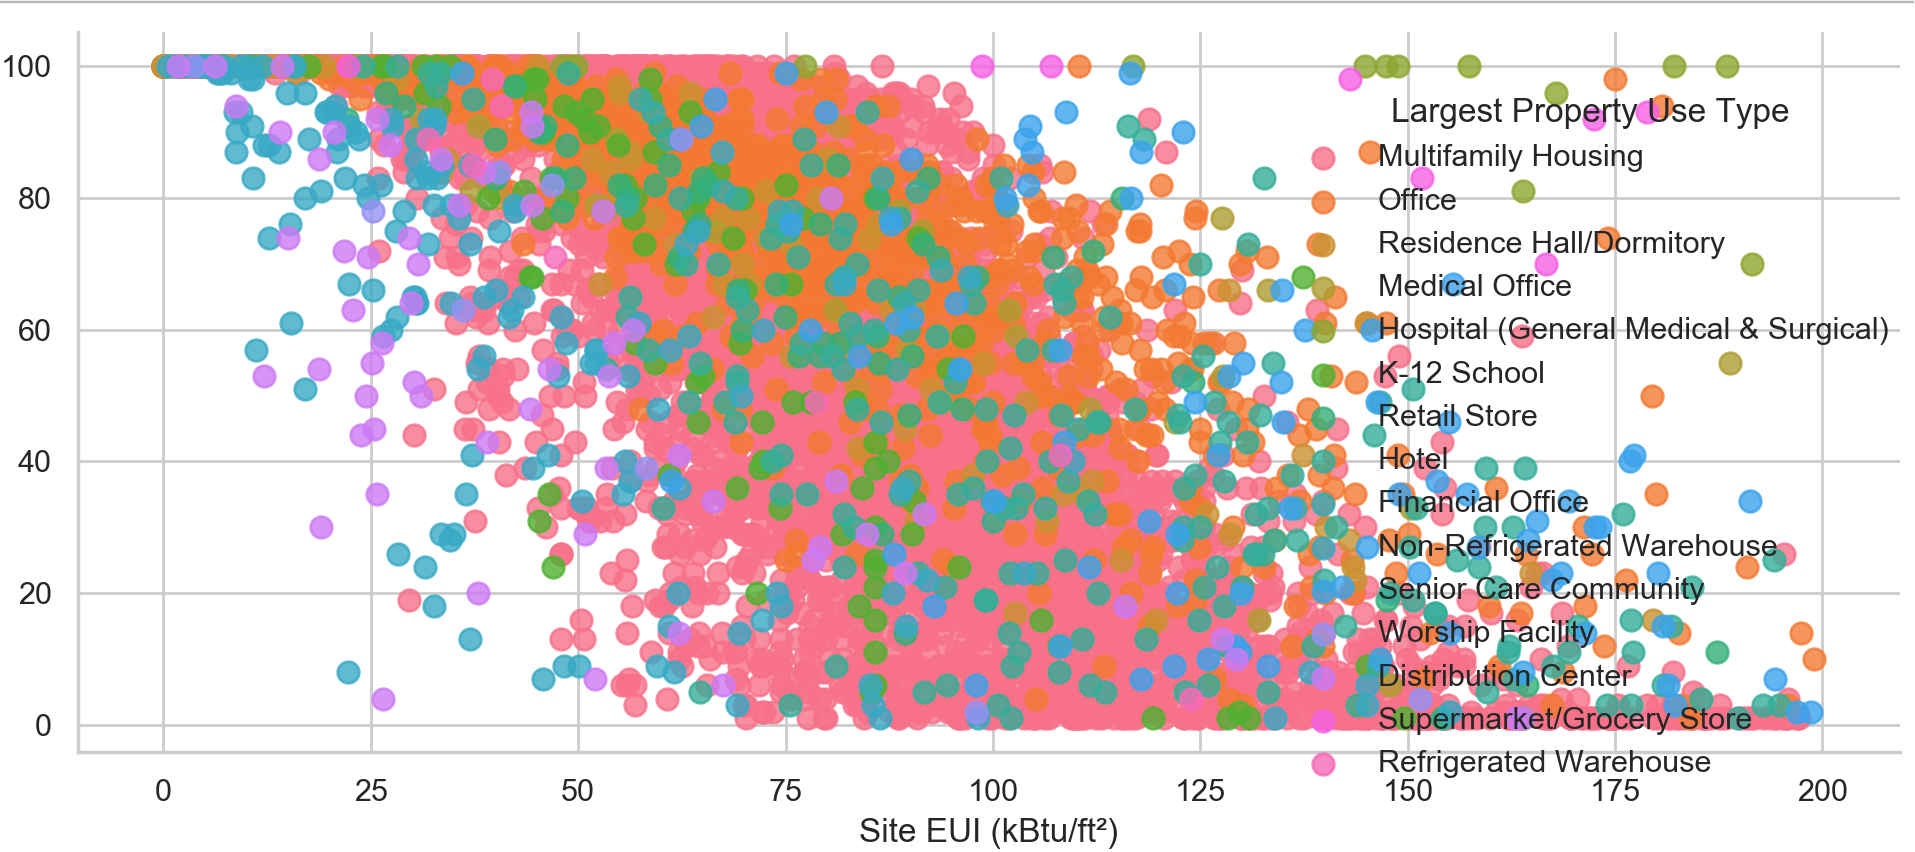

In [12]:
plot_data = features[['score', 'Site EUI (kBtu/ft²)','Weather Normalized Source EUI (kBtu/ft²)','log_Total GHG Emissions (Metric Tons CO2e)']]
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI','Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

C:\Users\sujit\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


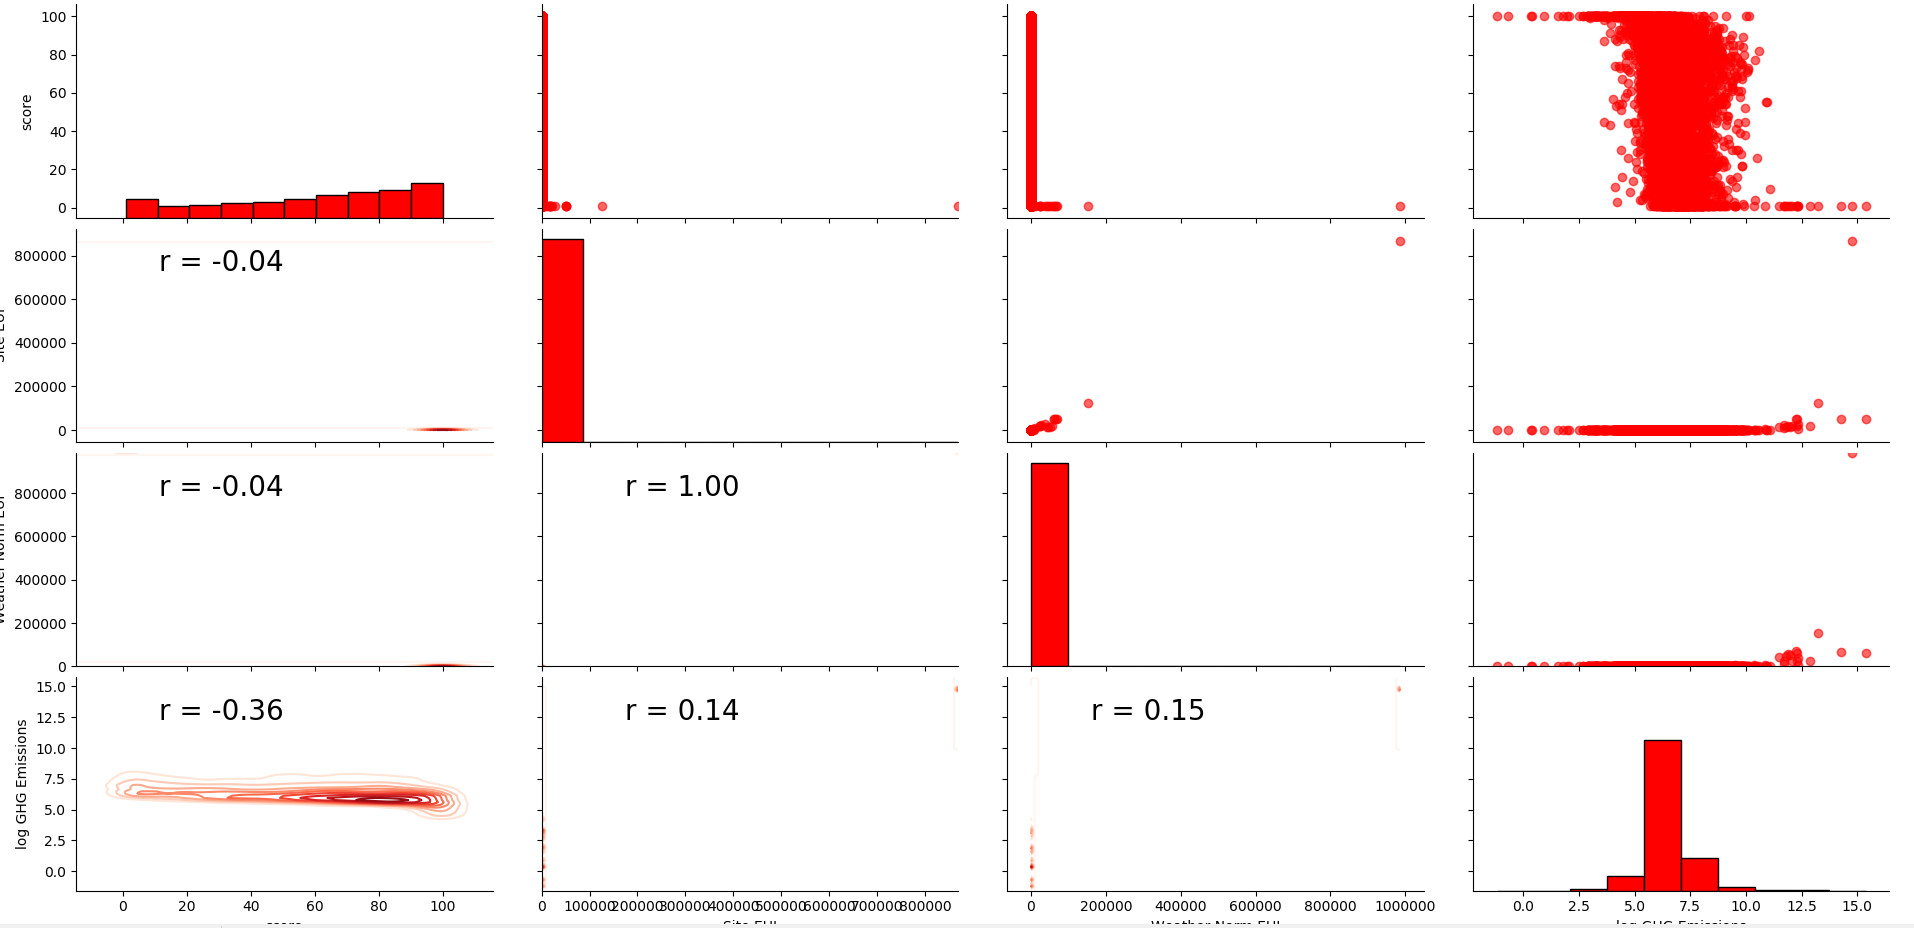

## Conclusion: 
1. From the above pair plot we can conclude the different relationships with the variables . 
2. There is postive corealtion between some of the features and its a good sign for us 